ЛАБОРАТОРНАЯ РАБОТА 7. РАЗРАБОТКА ЕДИНОГО ШАБЛОНА ПРЕДВАРИТЕЛЬНОЙ ОБРАБОТКИ ДАННЫХ

Цели и задачи

Цель лабораторной работы: изучение теоретических принципов и инструментальных редств для построения пайплайна для предварительной обработки данных.
Основные задачи:
–	предварительная обработка данных;
–	изучение библиотек для предварительной обработки данных;
–	масштабирование признаков;
–	представление категориальных данных;
–	построение пайплайна для предварительной обработки данных.

Теоретическое обоснование

Для решения задач машинного обучения часто приходится повторять различные блоки кода, которые являются единоообразными для разных задач, принадлежащих одному классу (регрессия, классификация, кластеризация и т.д.). Данное обстоятельство приводит к повторяющемуся шаблонному коду.
Такой код называется boilerplate-код или просто boilerplate. С другой стороны, единообразная последовательность действий, которую выполняет разработчик при решении задач машинного обучения часто называется пайплайном (machine learning pipeline).
Рассмотрим простейший пайплан для решения задачи регрессии. Для решения задачи регрессии небходимо реализовать (в общем случае) следующие стадии:
1.	Загрузка набора данных.
2.	Заполнение пропусков данных в соответствии с выбранной стратегией.
3.	Масштабирование признаков.
4.	Обработка категоривальных признаков.
5.	Разделение на тестовую и тренировочную выборку.
6.	Обучение модели.
7.	Интерпретация и визуализация результатов.

Заполнение пропусков в данных missingvalues = SimpleImputer(missing_values = np.nan, strategy = 'mean',
verbose = 0) missingvalues = missingvalues.fit(X[:, 1:3])
X[:, 1:3]=missingvalues.transform(X[:, 1:3])

Масштабирование признаков (standartisation и normalization) from sklearn.preprocessing import StandardScaler

Разделение на тестовую и обучающую выборки: from sklearn.model_selection import train_test_split from sklearn.cross_validation import train_test_split

Перед выполнением лабораторной работы необходимо ознакомиться с
базовыми принципами языка Python, используя следующие источники: [1-5].

Оборудование и материалы

Для выполнения лабораторной работы рекомендуется использовать персональный компьютер со следующими программными средствами разработки (выбрать один или несколько програмных продуктов для практической реализации задач лабораторной работы): MS Visual Studio 2013 и выше; среда разработки Java, интерпретатор Python (Jupyter Notebook).

Методика и порядок выполнения работы

Для тестирования универсального пайплайна будет использоваться модель линейоной регрессии (LinearRegression из библиотеки sklearn).

Постановка задачи.
Устовие. Построить пайплайн, реализующий первичную обработку данных.
Решение. Для решения задачи необходимо написать скрипт на яыке Python (рисунок 7.1).



In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [41]:
# Загрузка данных
dataset = pd.read_csv('social-media.csv')
print("Первые 5 строк датасета:")
print(dataset.head())

# Матрица признаков и зависимая переменная
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 3].values
print("Матрица признаков:")
print(X)
print("Зависимая переменная:")
print(y)

Первые 5 строк датасета:
   UserId  UsageDuraiton  Age       Country  TotalLikes
0       1              2   55        Turkey           5
1       2              6   45        Canada          10
2       3              3   50       Ireland           7
3       4              4   35  South Africa           5
4       5              1   58        Turkey           2
Матрица признаков:
[[1 2 55 'Turkey']
 [2 6 45 'Canada']
 [3 3 50 'Ireland']
 [4 4 35 'South Africa']
 [5 1 58 'Turkey']
 [6 13 18 'Turkey']
 [7 3 50 'Australia']
 [8 9 25 'Canada']
 [9 8 27 'Kosovo']
 [10 9 26 'Australia']
 [11 1 60 'Croatia']
 [12 9 19 'South Africa']
 [13 5 28 'Serbia']
 [14 2 58 'Croatia']
 [15 7 30 'South Africa']
 [16 11 18 'Singapore']
 [17 2 52 'Barbados']
 [18 2 50 'Bulgaria']
 [19 6 22 'Australia']
 [20 5 20 'Canada']
 [21 2 39 'Panama']
 [22 3 30 'Turkey']
 [23 4 26 'Bulgaria']
 [24 5 24 'Canada']
 [25 5 22 'Panama']
 [26 2 47 'Ireland']
 [27 1 50 'Mexico']
 [28 5 19 'Turkey']
 [29 4 18 'Turkey']
 [30 7 

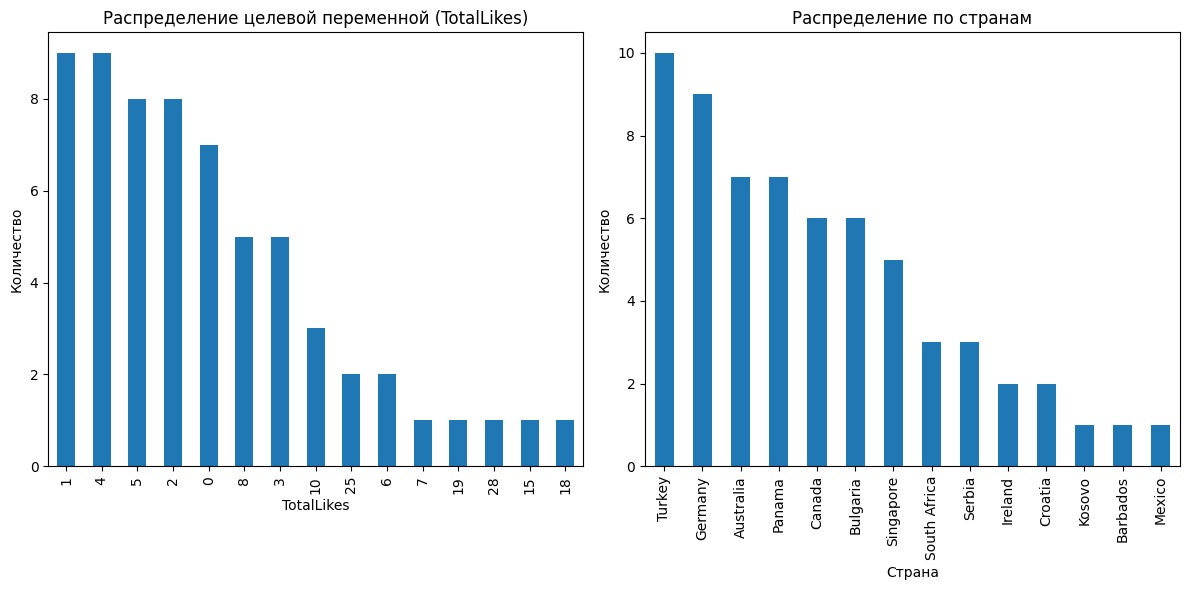

In [42]:
# Визуализация данных
plt.figure(figsize=(12, 6))

# Визуализация распределения целевой переменной
plt.subplot(1, 2, 1)
dataset['TotalLikes'].value_counts().plot(kind='bar')
plt.title('Распределение целевой переменной (TotalLikes)')
plt.xlabel('TotalLikes')
plt.ylabel('Количество')

# Визуализация распределения по странам
plt.subplot(1, 2, 2)
dataset['Country'].value_counts().plot(kind='bar')
plt.title('Распределение по странам')
plt.xlabel('Страна')
plt.ylabel('Количество')

plt.tight_layout()
plt.show()

In [43]:
# Обработка пропущенных значений
from sklearn.impute import SimpleImputer

# Создаем объект SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Применяем imputer к столбцам 1 и 2 (индексы 1 и 2)
X[:, 1:3] = imputer.fit_transform(X[:, 1:3])

# Выводим результат
print("Матрица признаков после обработки пропущенных значений:")
print(X)


Матрица признаков после обработки пропущенных значений:
[[1 2.0 55.0 'Turkey']
 [2 6.0 45.0 'Canada']
 [3 3.0 50.0 'Ireland']
 [4 4.0 35.0 'South Africa']
 [5 1.0 58.0 'Turkey']
 [6 13.0 18.0 'Turkey']
 [7 3.0 50.0 'Australia']
 [8 9.0 25.0 'Canada']
 [9 8.0 27.0 'Kosovo']
 [10 9.0 26.0 'Australia']
 [11 1.0 60.0 'Croatia']
 [12 9.0 19.0 'South Africa']
 [13 5.0 28.0 'Serbia']
 [14 2.0 58.0 'Croatia']
 [15 7.0 30.0 'South Africa']
 [16 11.0 18.0 'Singapore']
 [17 2.0 52.0 'Barbados']
 [18 2.0 50.0 'Bulgaria']
 [19 6.0 22.0 'Australia']
 [20 5.0 20.0 'Canada']
 [21 2.0 39.0 'Panama']
 [22 3.0 30.0 'Turkey']
 [23 4.0 26.0 'Bulgaria']
 [24 5.0 24.0 'Canada']
 [25 5.0 22.0 'Panama']
 [26 2.0 47.0 'Ireland']
 [27 1.0 50.0 'Mexico']
 [28 5.0 19.0 'Turkey']
 [29 4.0 18.0 'Turkey']
 [30 7.0 18.0 'Bulgaria']
 [31 1.0 18.0 'Canada']
 [32 4.0 19.0 'Canada']
 [33 1.0 55.0 'Bulgaria']
 [34 7.0 18.0 'Singapore']
 [35 4.0 18.0 'Singapore']
 [36 1.0 26.0 'Singapore']
 [37 8.0 18.0 'Singapore']
 [38 2.

In [44]:
# Обработка категориальных данных
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Создаем объект LabelEncoder для зависимой переменной
labelencoder_y = LabelEncoder()
print("Зависимая переменная до обработки:")
print(y)
y = labelencoder_y.fit_transform(y)
print("Зависимая переменная после обработки:")
print(y)

# Создаем объект LabelEncoder для категориального признака
labelencoder_X = LabelEncoder()
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])

# Создаем объект OneHotEncoder
onehotencoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Применяем OneHotEncoder к первому столбцу (индекс 0)
X = onehotencoder.fit_transform(X)

# Выводим результат
print("Перекодировка категориального признака:")
print(X)


Зависимая переменная до обработки:
['Turkey' 'Canada' 'Ireland' 'South Africa' 'Turkey' 'Turkey' 'Australia'
 'Canada' 'Kosovo' 'Australia' 'Croatia' 'South Africa' 'Serbia' 'Croatia'
 'South Africa' 'Singapore' 'Barbados' 'Bulgaria' 'Australia' 'Canada'
 'Panama' 'Turkey' 'Bulgaria' 'Canada' 'Panama' 'Ireland' 'Mexico'
 'Turkey' 'Turkey' 'Bulgaria' 'Canada' 'Canada' 'Bulgaria' 'Singapore'
 'Singapore' 'Singapore' 'Singapore' 'Turkey' 'Germany' 'Germany'
 'Germany' 'Germany' 'Germany' 'Germany' 'Germany' 'Serbia' 'Serbia'
 'Panama' 'Panama' 'Turkey' 'Turkey' 'Panama' 'Panama' 'Australia'
 'Australia' 'Australia' 'Australia' 'Bulgaria' 'Turkey' 'Germany'
 'Bulgaria' 'Germany' 'Panama']
Зависимая переменная после обработки:
[13  3  6 12 13 13  0  3  7  0  4 12 10  4 12 11  1  2  0  3  9 13  2  3
  9  6  8 13 13  2  3  3  2 11 11 11 11 13  5  5  5  5  5  5  5 10 10  9
  9 13 13  9  9  0  0  0  0  2 13  5  2  5  9]
Перекодировка категориального признака:
[[1. 0. 0. ... 0. 0. 1.]
 [0. 1. 0.

In [45]:
# Разделение выборки на тестовую и тренировочную
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("Размер тренировочной выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)


Размер тренировочной выборки: (50, 110)
Размер тестовой выборки: (13, 110)


Индивидуальное задание
1.	Подберите набор данных на ресурсах [5-7] и согласуйте свой выбор с преподавателем. Студент может предложить набор данных в соответствии с тематикой магистерского исследования.
2.	Реализуйте первичную обработку данных загруженного набора. Выполните полный спектр операций для загруженного набора данны: загрузка, визуализация, обработка пропущенных значений, обработка категориальных данных и разделение выборки на тестовую и тренировочную.

Содержание отчета и его форма

Отчет по лабораторной работе должен содержать:
1.	Номер и название лабораторной работы; задачи лабораторной работы.
2.	Реализация каждого пункта подраздела «Индивидуальное задание» с приведением исходного кода программы, диаграмм и графиков для визуализации данных.
3.	Ответы на контрольные вопросы.
4.	Экранные формы (консольный вывод) и листинг программного кода с комментариями, показывающие порядок выполнения лабораторной работы, и результаты, полученные в ходе её выполнения.
Отчет о выполнении лабораторной работы сдается преподавателю.

Контрольные вопросы

1.	Какая библиотека python предназначена для управления наборами данных: numpy, pandas, sklearn, opencv, matplotlib?
2.	Какая стратегия является нежелательной при обработке пропусков в данных?
а) замена пропущенных значений в столбце медианным значением по
данному столбцу;
б) удаление строк, содержащих пропуски в данных;
в) замена пропущенных значений в столбце средним арифметическим
значением по данному столбцу;
	г) 	замена 	пропущенных 	значений 	в 	столбце 	наиболее 	часто
встречающимся значением по данному столбцу;
3.	Обоснуйте ответ на следующую проблему предварительной обработки данных: имеется независимая категориальная переменная y, которая представляет собой категориальный признак, опеределнный на домене {C#, Java, Python, R}. Нужно ли применять к данному целевому признаку OneHotEncoder?
4.	Поясните принцип разбиения набора данных на обучающую и тестовую выборку. Какое соотношение «тестовая:обучающая» наиболее оптимально: 20:80, 50:50, 25:75, 5:95, 40:30?
5.	Какой код лучше использовать при загрузке данных из csv-файла?
а) dataset = read_csv(“data.csv”)
б) dataset = import(“data.csv”)
в) dataset = read.csv(“data.csv”)
г) dataset = import.csv(“data.csv”)
д) dataset = read_xls(“data.csv”)

Список литературы

Для выполнения лабораторной работы, при подготовке к защите, а также для ответа на контрольные вопросы рекомендуется использовать следующие
источники: [1, 2, 5-7].


